<a href="https://colab.research.google.com/github/rohithmallula19/CustomerChurnPrediction/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
df= pd.read_csv('Telco Customer Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for key in df.columns:
  print(df[key].value_counts(),'\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: gender, dtype: int64 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No         

<AxesSubplot:>

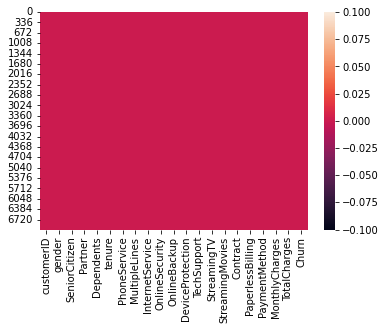

In [ ]:
sns.heatmap(df.isna())

<AxesSubplot:>

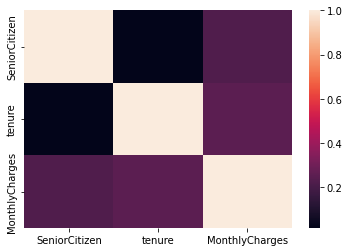

In [ ]:
sns.heatmap(df.corr())

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
df.TotalCharges.head(15)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
Name: TotalCharges, dtype: object

In [23]:
df.TotalCharges= pd.to_numeric(df["TotalCharges"],errors='coerce')

In [26]:
df.TotalCharges.isna().sum()

11

In [29]:
m=df.TotalCharges.mean()
m


2283.3004408418656

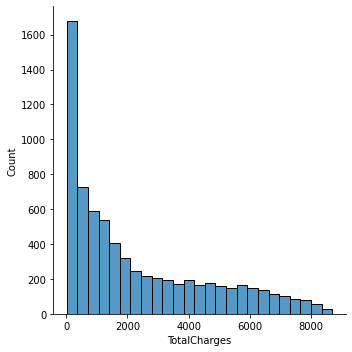

In [34]:
sns.displot(df.TotalCharges)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

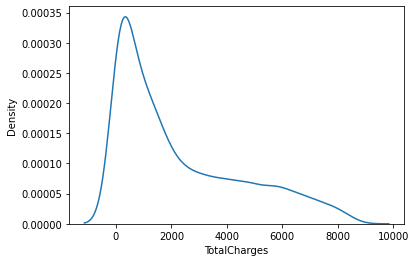

In [32]:
sns.kdeplot(df.TotalCharges)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

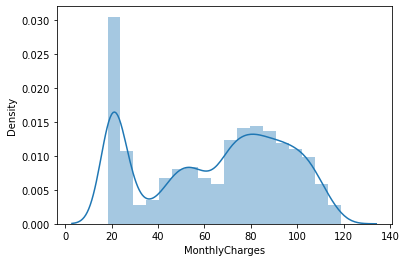

In [73]:
sns.distplot(df.MonthlyCharges)

In [35]:
df.TotalCharges=df.TotalCharges.fillna(m)

In [37]:
df.TotalCharges.isna().sum()

0

In [ ]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [38]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [42]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [52]:
df=df.drop('customerID',axis=1)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [59]:
df.SeniorCitizen=df.SeniorCitizen.astype('object')

In [60]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [61]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Finding Outliers

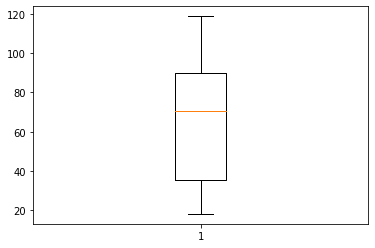

In [70]:

q1= df.MonthlyCharges.quantile(0.25)
q3= df.MonthlyCharges.quantile(0.75)
iqr= q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df.MonthlyCharges < lower_bound) | (df.MonthlyCharges > upper_bound)]
plt.boxplot(df.MonthlyCharges)
plt.show()









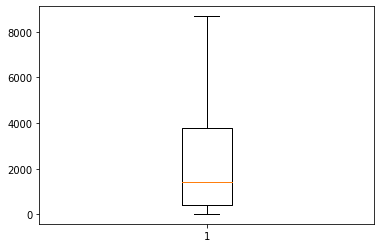

In [71]:
q1= df.TotalCharges.quantile(0.25)
q3= df.TotalCharges.quantile(0.75)
iqr= q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df.TotalCharges < lower_bound) | (df.TotalCharges > upper_bound)]
plt.boxplot(df.TotalCharges)
plt.show()


In [85]:
y= df.Churn
X= df[[col for col in df.columns if col!= 'Churn']]

In [87]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [88]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

Model Building

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [93]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2719,Female,1,Yes,Yes,56,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),72.60,4084.35
3821,Female,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.20,74.20
148,Male,0,No,Yes,30,Yes,No,DSL,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),64.50,1929.95
3300,Female,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,579.40
3928,Female,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.95,1745.50


In [94]:
y_train.head()

2719     No
3821    Yes
148      No
3300     No
3928     No
Name: Churn, dtype: object

In [96]:
ohe_X_train= pd.get_dummies(X_train,drop_first=True)

In [97]:
ohe_X_test= pd.get_dummies(X_test,drop_first=True)

In [98]:
ohe_X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2719,56,72.60,4084.35,0,1,1,1,1,0,0,...,0,1,0,1,0,1,1,1,0,0
3821,1,74.20,74.20,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
148,30,64.50,1929.95,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3300,33,20.10,579.40,0,0,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
3928,18,95.95,1745.50,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


<AxesSubplot:>

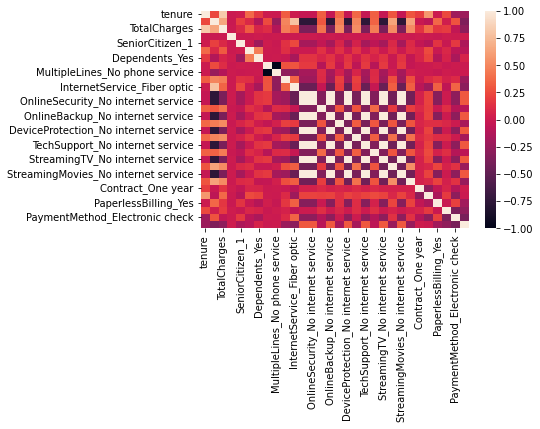

In [99]:
sns.heatmap(ohe_X_train.corr())

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [101]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(ohe_X_train, y_train)

DecisionTreeClassifier(max_depth=4)

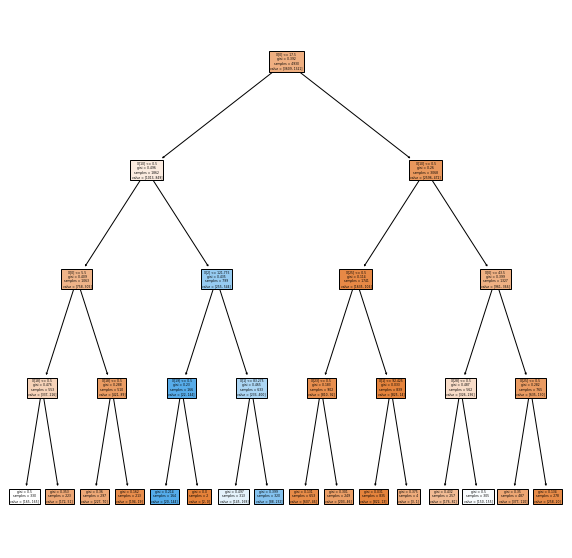

In [102]:
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True)
plt.show()

In [103]:
dot_data = export_graphviz(clf, out_file=None,
                           #feature_names=iris.feature_names,
                           #class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

In [104]:
graph = graphviz.Source(dot_data)
graph.render('decision_tree', view=True)

'decision_tree.pdf'

In [105]:
clf.score(ohe_X_train,y_train)

0.7920892494929006

In [106]:
clf.score(ohe_X_test,y_test)

0.7832465688594415

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbf= GradientBoostingClassifier()

In [108]:
gbf.fit(ohe_X_train,y_train)
gbf.score(ohe_X_train,y_train)

0.8308316430020284

In [109]:
gbf.score(ohe_X_test,y_test)

0.795551348793185

In [112]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7]
}

gbf_grid = GridSearchCV(gbf,
                        param_grid,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

gbf_grid.fit(ohe_X_train, y_train)
gbf_cv = (gbf_grid.best_estimator_)


In [114]:
gbf_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [115]:
gbf_grid.best_score_

0.8042615110234429

In [116]:
gbf_cv = (gbf_grid.best_estimator_)

In [ ]:
eval_set = [(ohe_X_train, y_train),
            (X_val, y_val)]

In [ ]:
fit_model = gbf_cv.fit(
    ohe_X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)